In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import operator

In [58]:
hatecrime= pd.read_csv(r'C:\Users\osaig\Downloads\HateCrimeNoNA.csv',index_col=[0])

In [59]:
hatecrime.head()

,Unnamed: 0.1,State,AgencyType,Agency,RaceEthnAnc,Religion,SexualOrientation,Disability,Gender,GenderID,Q1,Q2,Q3,Q4,Population
0,1,Alaska,Cities,Anchorage,4.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,3.0,0.000000,287731.0
1,2,Alaska,Cities,Fairbanks,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,31493.0
2,3,Alaska,Cities,Kotzebue,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,3272.0
3,4,Alaska,Cities,North Pole,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.875839,2111.0
4,5,Alaska,Cities,Soldotna,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,4756.0


In [60]:
hatecrime = hatecrime.drop(['Disability','GenderID'],axis=1)

In [61]:
hatecrime.head()

,Unnamed: 0.1,State,AgencyType,Agency,RaceEthnAnc,Religion,SexualOrientation,Gender,Q1,Q2,Q3,Q4,Population
0,1,Alaska,Cities,Anchorage,4.0,0.0,2.0,0.0,1.0,2.0,3.0,0.000000,287731.0
1,2,Alaska,Cities,Fairbanks,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,31493.0
2,3,Alaska,Cities,Kotzebue,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,3272.0
3,4,Alaska,Cities,North Pole,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.875839,2111.0
4,5,Alaska,Cities,Soldotna,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.000000,4756.0


In [62]:
hatecrime.rename( columns={'Unnamed: 0.1':'Numbered', }, inplace=True )

In [63]:
hatecrime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Numbered           2175 non-null   int64  
 1   State              2167 non-null   object 
 2   AgencyType         2173 non-null   object 
 3   Agency             2173 non-null   object 
 4   RaceEthnAnc        2175 non-null   float64
 5   Religion           2175 non-null   float64
 6   SexualOrientation  2175 non-null   float64
 7   Gender             2175 non-null   float64
 8   Q1                 2175 non-null   float64
 9   Q2                 2175 non-null   float64
 10  Q3                 2175 non-null   float64
 11  Q4                 2175 non-null   float64
 12  Population         2175 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 212.4+ KB


### hatecrime.count()  that does not include number or unnamed values

In [64]:

hatecrime2 = hatecrime[[column for column in hatecrime if hatecrime[column].count() / len(hatecrime) >= 0.3]]
del hatecrime2['Numbered']
print("List of dropped columns:", end=" ")
for c in hatecrime.columns:
    if c not in hatecrime2.columns:
        print(c, end=", ")
print('\n')
hatecrime = hatecrime2

List of dropped columns: Numbered, 



### We will check the Type


count    2175.000000
mean        1.907459
std         6.958888
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max       178.000000
Name: RaceEthnAnc, dtype: float64


C:\Users\osaig\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


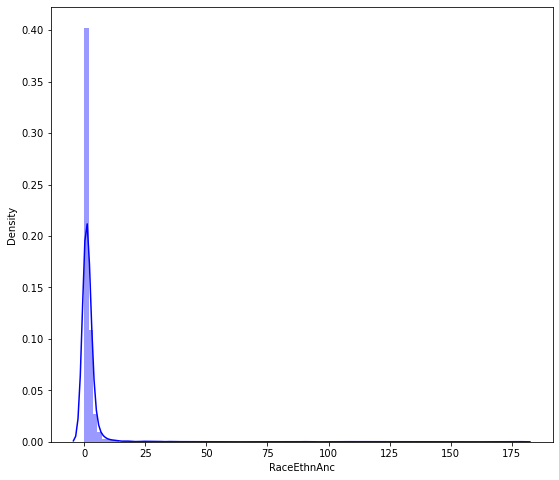

In [65]:
print(hatecrime['RaceEthnAnc'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(hatecrime['RaceEthnAnc'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [66]:
list(set(hatecrime.dtypes.tolist()))

[dtype('O'), dtype('float64')]

### Check Data

In [67]:
hatecrime_num = hatecrime.select_dtypes(include = ['float64', 'int64', 'object'])
hatecrime_num.head()

,State,AgencyType,Agency,RaceEthnAnc,Religion,SexualOrientation,Gender,Q1,Q2,Q3,Q4,Population
0,Alaska,Cities,Anchorage,4.0,0.0,2.0,0.0,1.0,2.0,3.0,0.000000,287731.0
1,Alaska,Cities,Fairbanks,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,31493.0
2,Alaska,Cities,Kotzebue,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,3272.0
3,Alaska,Cities,North Pole,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.875839,2111.0
4,Alaska,Cities,Soldotna,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.000000,4756.0


### Plotting all the colmns

array([[<AxesSubplot:title={'center':'RaceEthnAnc'}>,
        <AxesSubplot:title={'center':'Religion'}>,
        <AxesSubplot:title={'center':'SexualOrientation'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Q1'}>,
        <AxesSubplot:title={'center':'Q2'}>],
       [<AxesSubplot:title={'center':'Q3'}>,
        <AxesSubplot:title={'center':'Q4'}>,
        <AxesSubplot:title={'center':'Population'}>]], dtype=object)

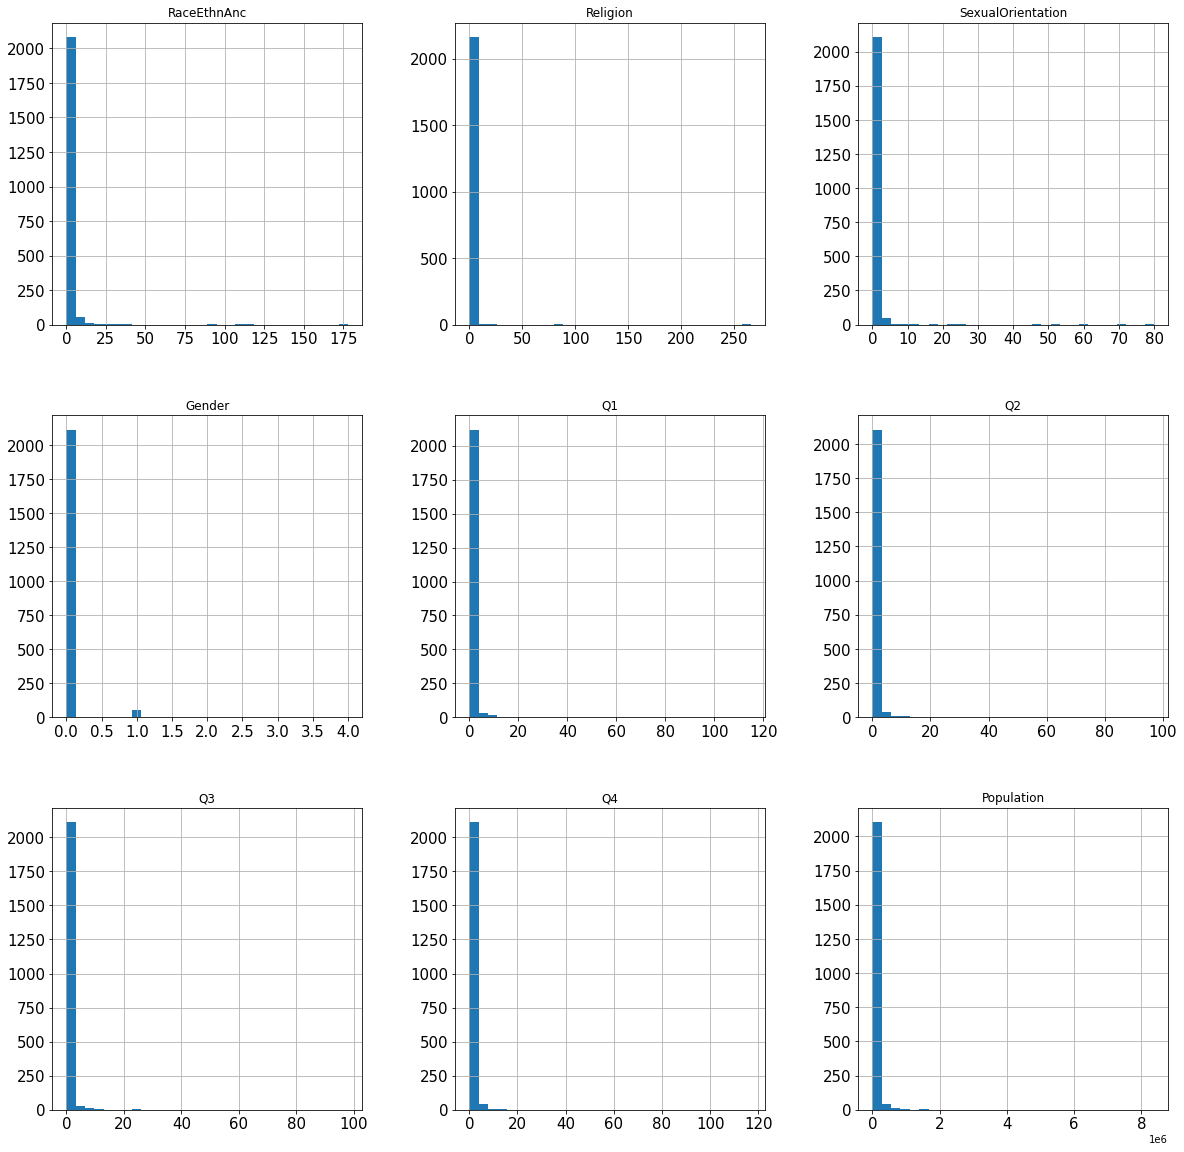

In [68]:
hatecrime_num.hist(figsize=(20, 20), bins=30, xlabelsize=15, ylabelsize=15)

### Correlation 

In [69]:
hatecrime.corr()

,RaceEthnAnc,Religion,SexualOrientation,Gender,Q1,Q2,Q3,Q4,Population
RaceEthnAnc,1.000000,0.489732,0.915044,0.411167,0.824297,0.909156,0.918140,0.844158,0.551416
Religion,0.489732,1.000000,0.560629,0.066860,0.833738,0.726035,0.695208,0.822978,0.824479
SexualOrientation,0.915044,0.560629,1.000000,0.342446,0.850199,0.921509,0.935365,0.846307,0.615071
Gender,0.411167,0.066860,0.342446,1.000000,0.251944,0.319653,0.342674,0.318787,0.073919
Q1,0.824297,0.833738,0.850199,0.251944,1.000000,0.911347,0.893693,0.913530,0.791903
Q2,0.909156,0.726035,0.921509,0.319653,0.911347,1.000000,0.930581,0.897135,0.713097
Q3,0.918140,0.695208,0.935365,0.342674,0.893693,0.930581,1.000000,0.904579,0.703482
Q4,0.844158,0.822978,0.846307,0.318787,0.913530,0.897135,0.904579,1.000000,0.765684
Population,0.551416,0.824479,0.615071,0.073919,0.791903,0.713097,0.703482,0.765684,1.000000


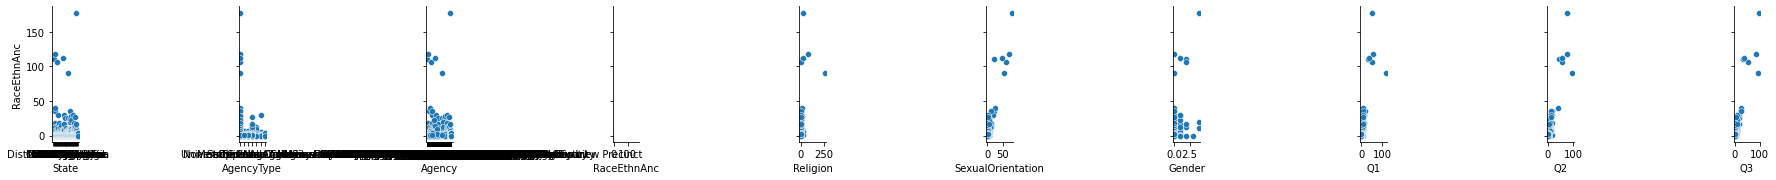

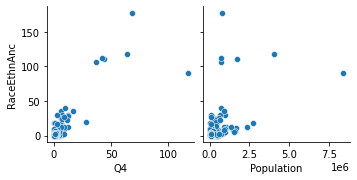

In [74]:
for i in range(0, len(hatecrime_num.columns), 10):
    sns.pairplot(data=hatecrime_num,
                x_vars=hatecrime_num.columns[i:i+10],
                y_vars=['RaceEthnAnc'])

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

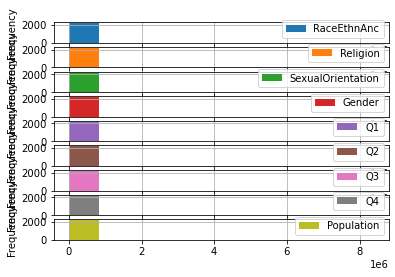

In [75]:
hatecrime.plot.hist( subplots = True, grid = True)


### Let's see the outcome with a pie graph

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import numpy as np

In [148]:
dist = hatecrime['Gender'].value_counts()
colors = ['mediumturquoise', 'darkorange']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='Gender outcome')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

### Let's see it in boxplots

In [149]:
fig = px.box(hatecrime, x='State', y='RaceEthnAnc')
fig.update_traces(marker_color="midnightblue",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='State and RaceEthnAnc')
fig.show()

### Looks like crime stayed consistant the District of Columbia in 2019 but decreased in 4th quarter. And in Washington state arised in 2019 Q4